<a href="https://colab.research.google.com/github/Palak-bindal/Mobile-Price-Range-Prediction/blob/main/Classification_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Palak Bindal
##### **Team Member 2 -** Deepika Gupta 
##### **Team Member 3 -** Vashu Garg
##### **Team Member 4 -** Jyoti Singh
##### **Team Member 5 -** Somya Jain

# **Project Summary -**

First we do Exploratory Data Analysis on the data set. We look for missing data values,duplicates values (none were found) and outliers and appropriately modify them. we have seen relation b/w numeric features and dependent variables and seen different price range in the terms of ram,bluetooth supported or not, battery power, wifi supported or not etc.We checked the data is balanced or not, We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering to modify few existing columns and drop out irrelavant ones.we normilized the independent features through mini-max scaler and later we have done hypothesis testing where we find out the p value using F-test and seen whether the null hypothesis is rejected or not.

We then look at several popular individual models from simple ones like Logistic regression for multiclass data, to more complicated ensemble ones like Decision Tree, Random Forest, XG Boost, Naive Bayes, KNN, Support vector machine and find out best model through the highest accuracy for the business deployment.

# **GitHub Link -**

https://github.com/Palak-bindal/Mobile-Price-Range-Prediction

# **Problem Statement**


In the compitive mobile phone market in the compinies want to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone (eg. Ram, Internal memory etc.) and Its selling price.
In this problem, we do not have to predict the actual price but a price range indecating how high the price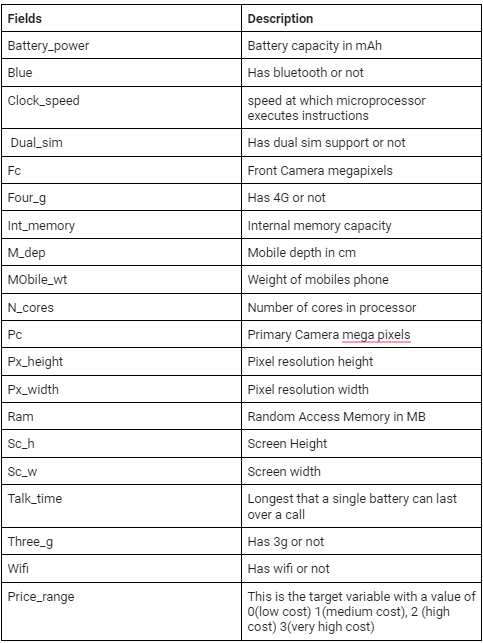

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [185]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [186]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [187]:
# Dataset First Look
mb_price_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Classification ML-Mobile Price Range Prediction /data_mobile_price_range.csv')
mb_price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2. ***Data Wrangling***

### Dataset Rows & Columns count

In [188]:
# Dataset Rows & Columns count
mb_price_df.shape

(2000, 21)

### Dataset Information

In [189]:
# Dataset Info
mb_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [190]:
# Dataset Duplicate Value Count
len(mb_price_df[mb_price_df.duplicated()])


0

#### Missing Values/Null Values

In [191]:
# Missing Values/Null Values Count
mb_price_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

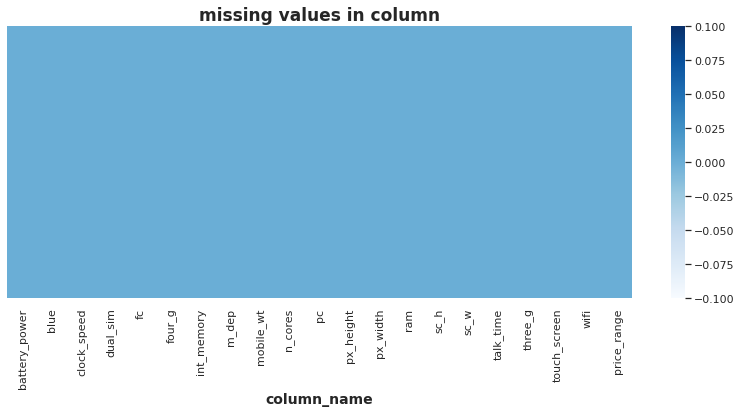

In [192]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(mb_price_df.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

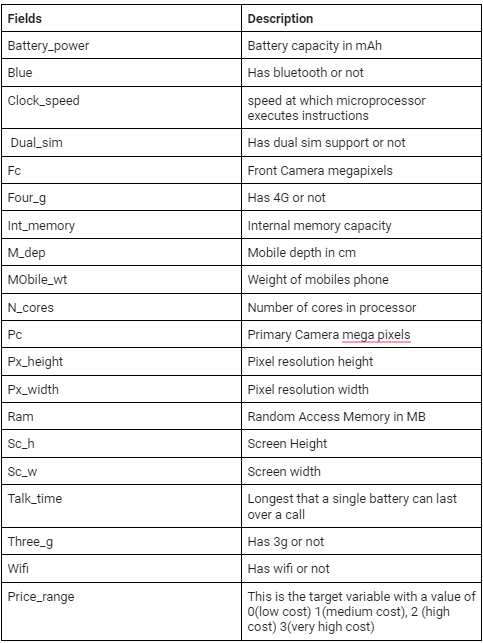

## ***2. Understanding Your Variables***

In [193]:
# Dataset Columns
mb_price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [194]:
# Dataset Describe
mb_price_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 




1.   Two variables are float data type
2.   19 variables belongs to integer data type



### Check Unique Values for each variable.

In [195]:
# Check Unique Values for each variable.
for i in ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']:
  print(mb_price_df[i].value_counts())

0    1010
1     990
Name: blue, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


### Data Wrangling 

## ***Uni-variate Analysis***

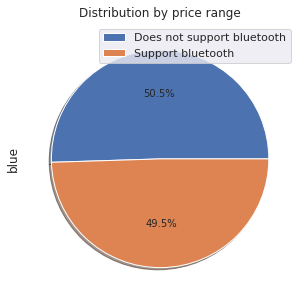

In [196]:
# Write your code to make your dataset analysis ready.
fig,ax=plt.subplots(figsize=(10,5))
mb_price_df['blue'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)

ax.set_title('Distribution by price range')
ax.legend(['Does not support bluetooth', 'Support bluetooth'])
plt.show()


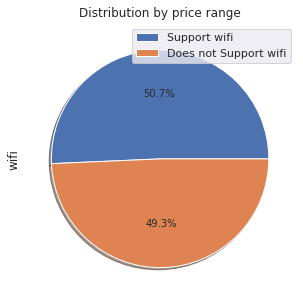

In [197]:
fig,ax=plt.subplots(figsize=(10,5))
mb_price_df['wifi'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)

ax.set_title('Distribution by price range')
ax.legend(['Support wifi', 'Does not Support wifi'])
plt.show()


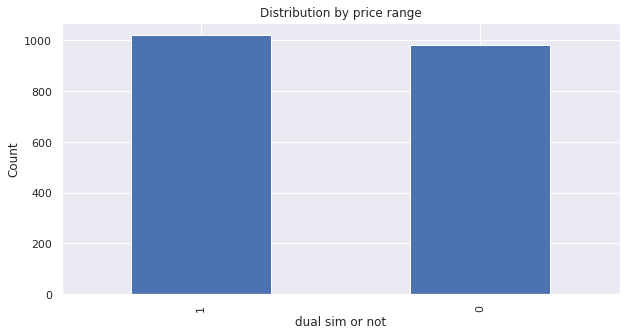

In [198]:
fig,ax=plt.subplots(figsize=(10,5))
mb_price_df['dual_sim'].value_counts().plot(kind='bar')
plt.xlabel('dual sim or not')
plt.ylabel('Count')
ax.set_title('Distribution by price range')
plt.show()


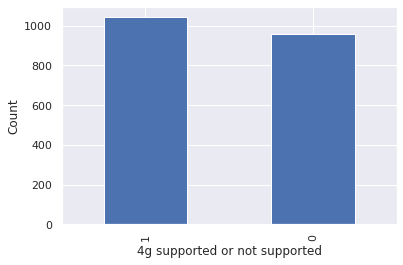

In [199]:
mb_price_df['four_g'].value_counts().plot(kind='bar')
plt.xlabel('4g supported or not supported')
plt.ylabel('Count')
plt.show()


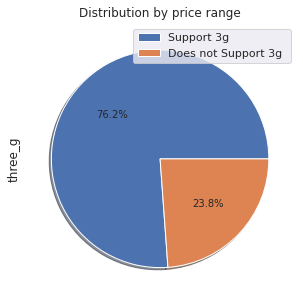

In [200]:

fig,ax=plt.subplots(figsize=(10,5))
mb_price_df['three_g'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)

ax.set_title('Distribution by price range')
ax.legend(['Support 3g ', 'Does not Support 3g '])
plt.show()

In [201]:
# Total phones with sc_w = 0
print(len(mb_price_df[mb_price_df.sc_w == 0]))
print(len(mb_price_df[mb_price_df.sc_h == 0]))
# Total phones with px_height = 0
print(len(mb_price_df[mb_price_df.px_height == 0]))
print(len(mb_price_df[mb_price_df.px_width == 0]))
     

180
0
2
0


In [202]:
#where there is sc_W and px_height is zero ,assigning mean values
mb_price_df['sc_w'][mb_price_df[mb_price_df.sc_w == 0].index] = mb_price_df.sc_w.median()
mb_price_df['px_height'][mb_price_df[mb_price_df.px_height == 0].index] = mb_price_df.px_height.median()


In [203]:
df_sc_w = pd.DataFrame(mb_price_df.groupby('sc_w')['price_range'].sum())
df_sc_w.reset_index(inplace=True)
df_sc_w

,sc_w,price_range
0,1,341
1,2,246
2,3,288
3,4,254
4,5,492
5,6,178
6,7,179
7,8,189
8,9,144
9,10,147


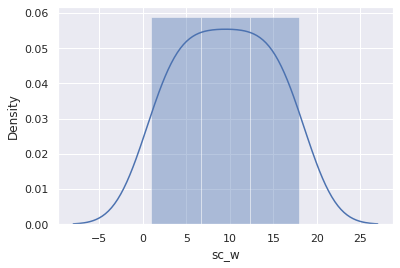

In [204]:
sns.distplot(df_sc_w['sc_w'])
plt.show()

In [205]:
df_px_height= pd.DataFrame(mb_price_df.groupby('px_height')['price_range'].sum())
df_px_height.reset_index(inplace=True)


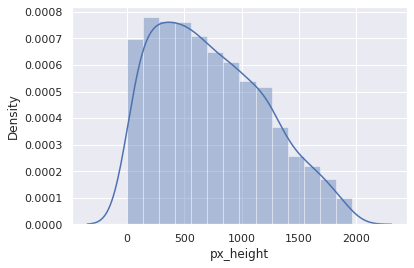

In [206]:
sns.distplot(df_px_height['px_height'])
plt.show()

In [207]:
mb_price_df.nunique()


battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1562
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

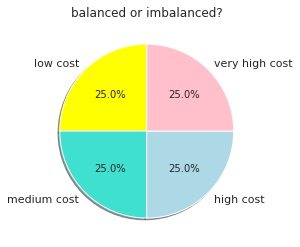

In [208]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = mb_price_df['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#dataset is balanced


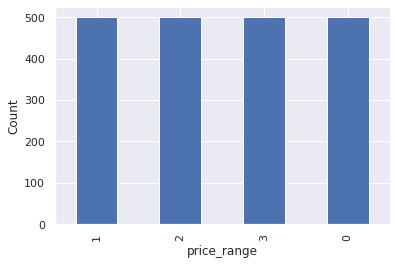

In [209]:
#classes
sns.set()
price_plot=mb_price_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()
 

there are mobile phones in 4 price ranges. The number of elements is almost similar.



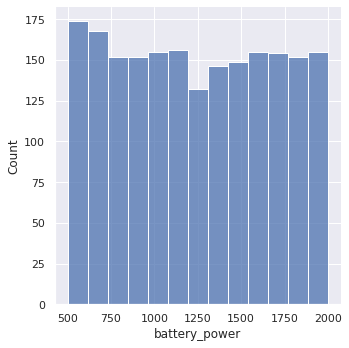

In [210]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(mb_price_df["battery_power"])
plt.show()


this plot shows how the battery mAh is spread. there is a gradual increase as the price range increases



## ***3. Exploratory Data Analysis***

### ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Bivariate Analysis**

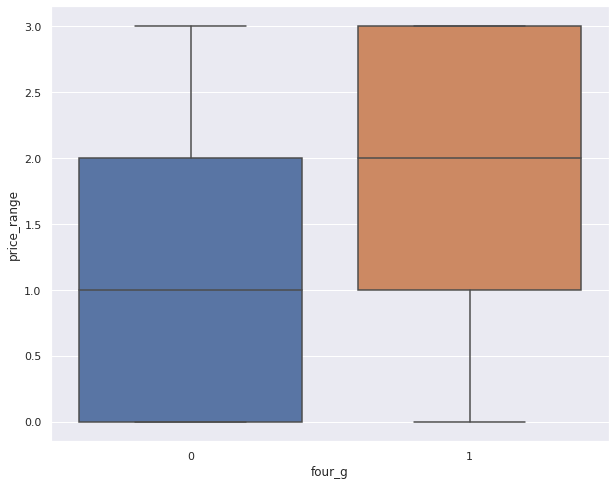

In [211]:
plt.figure(figsize=(10,8))
sns.boxplot(x=mb_price_df['four_g'],y=mb_price_df["price_range"])
plt.show()


The box plot shows that the price is high if the phone is 4g supported

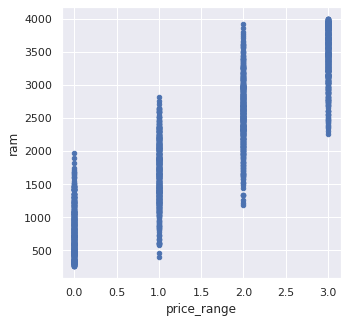

In [212]:
mb_price_df.plot(x='price_range',y='ram',kind='scatter')
plt.show()


Ram is also increasing with price range while moving from Low cost to Very high cost



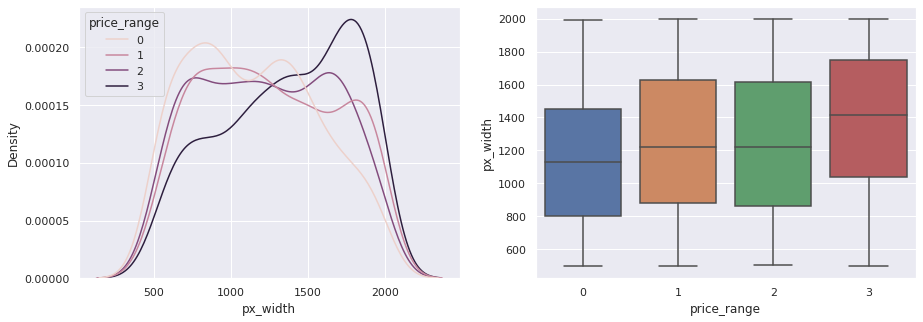

In [213]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='px_width', ax=axs[1])
plt.show()


There is a increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.



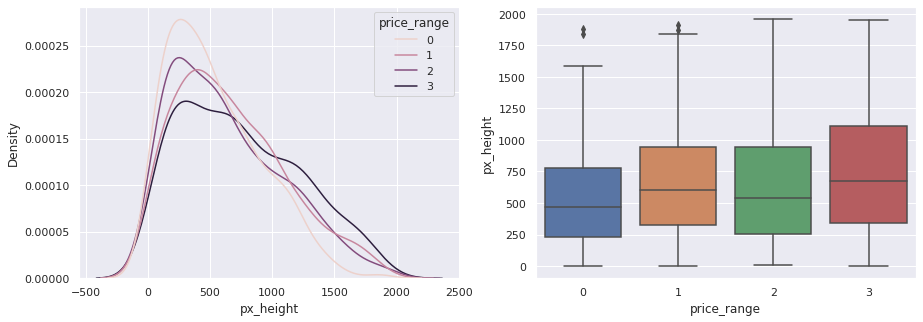

In [214]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='px_height', ax=axs[1])
plt.show()


Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height



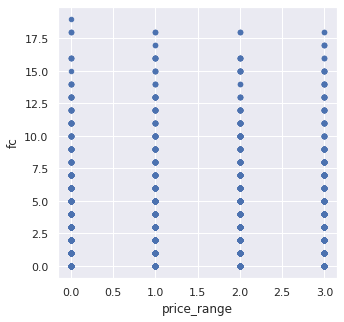

In [215]:
mb_price_df.plot(x='price_range',y='fc',kind='scatter')
plt.show()


This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions



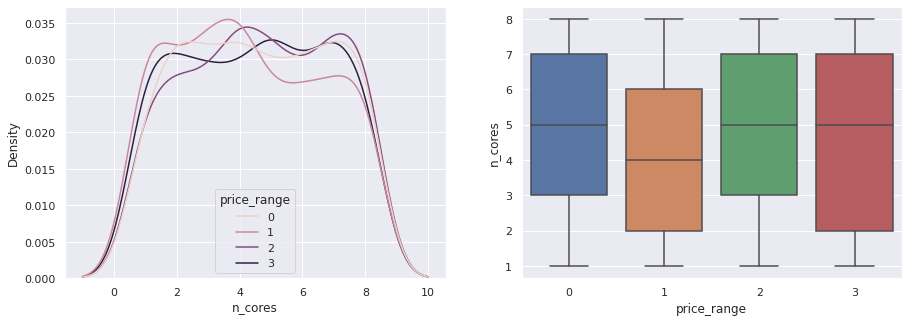

In [216]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='n_cores', ax=axs[1])
plt.show()


No. of cores is not showing much variation along the target categories, which shows that may not impact the price directly.



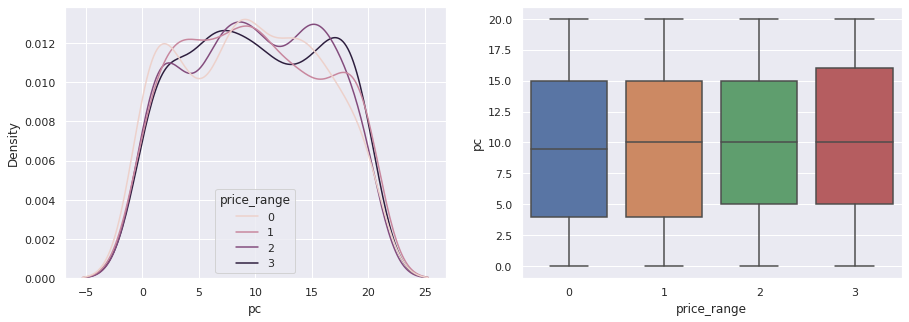

In [217]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='pc', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='pc', ax=axs[1])
plt.show()


It shows that phones with better primary camera has high price.

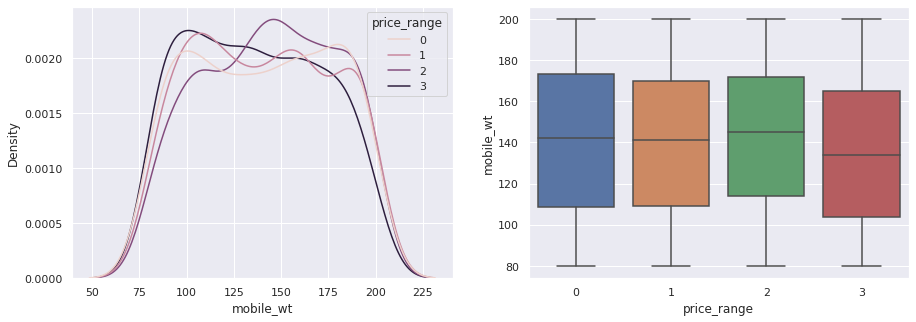

In [218]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()


As we can see in the above plot costly phone are lighter





### ***4. Feature Engineering & Data Pre-processing***

# **screen_size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.



In [219]:
# Defining new variable sc_size

mb_price_df['screen_size'] = np.sqrt((mb_price_df['sc_h']**2) + (mb_price_df['sc_w']**2))
mb_price_df['screen_size'] = round(mb_price_df['screen_size']/2.54, 2)


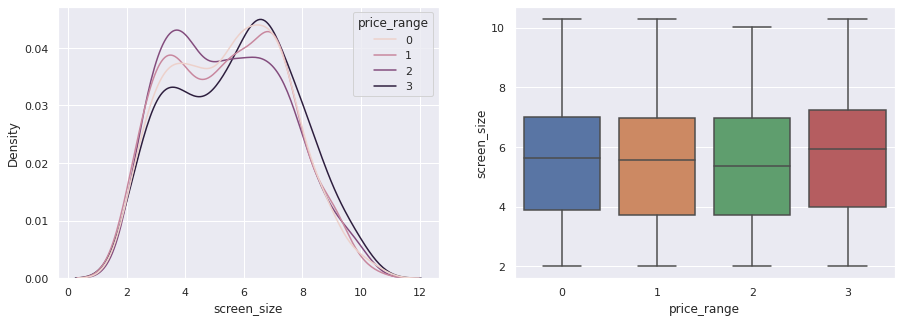

In [220]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=mb_price_df, x='screen_size', hue='price_range', ax=axs[0])
sns.boxplot(data=mb_price_df, x='price_range', y='screen_size', ax=axs[1])
plt.show()


Screen Size shows little variation along the price range.



In [221]:
# Let's drop sc_h and s_w now as we have already included them in screen size

mb_price_df.drop(columns=['sc_h', 'sc_w'], inplace = True)
mb_price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,19,0,0,1,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,7,1,1,0,2,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,9,1,1,0,2,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,11,1,0,0,2,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,15,1,1,0,1,3.25


In [222]:
imp_features = [ 'four_g', 'three_g']


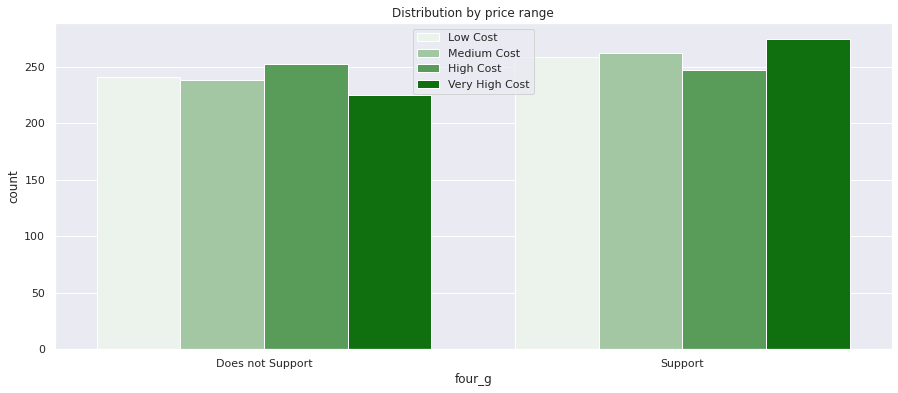

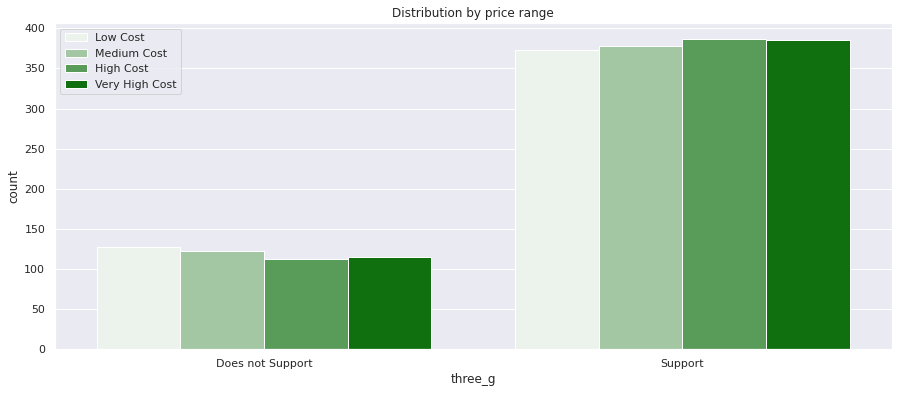

In [223]:
# Plot of binary features against price range

for col in imp_features:
  fig, axs = plt.subplots(ncols = 1, figsize = (15, 6))
  sns.countplot(x = col, hue = 'price_range', data =mb_price_df, ax = axs, color = 'green')
  axs.set_title('Distribution by price range')
  axs.set_xlabel(col)
  axs.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  axs.set_xticklabels(['Does not Support', 'Support'])


feature 'three_g' play is important feature in prediction than ''four_g'



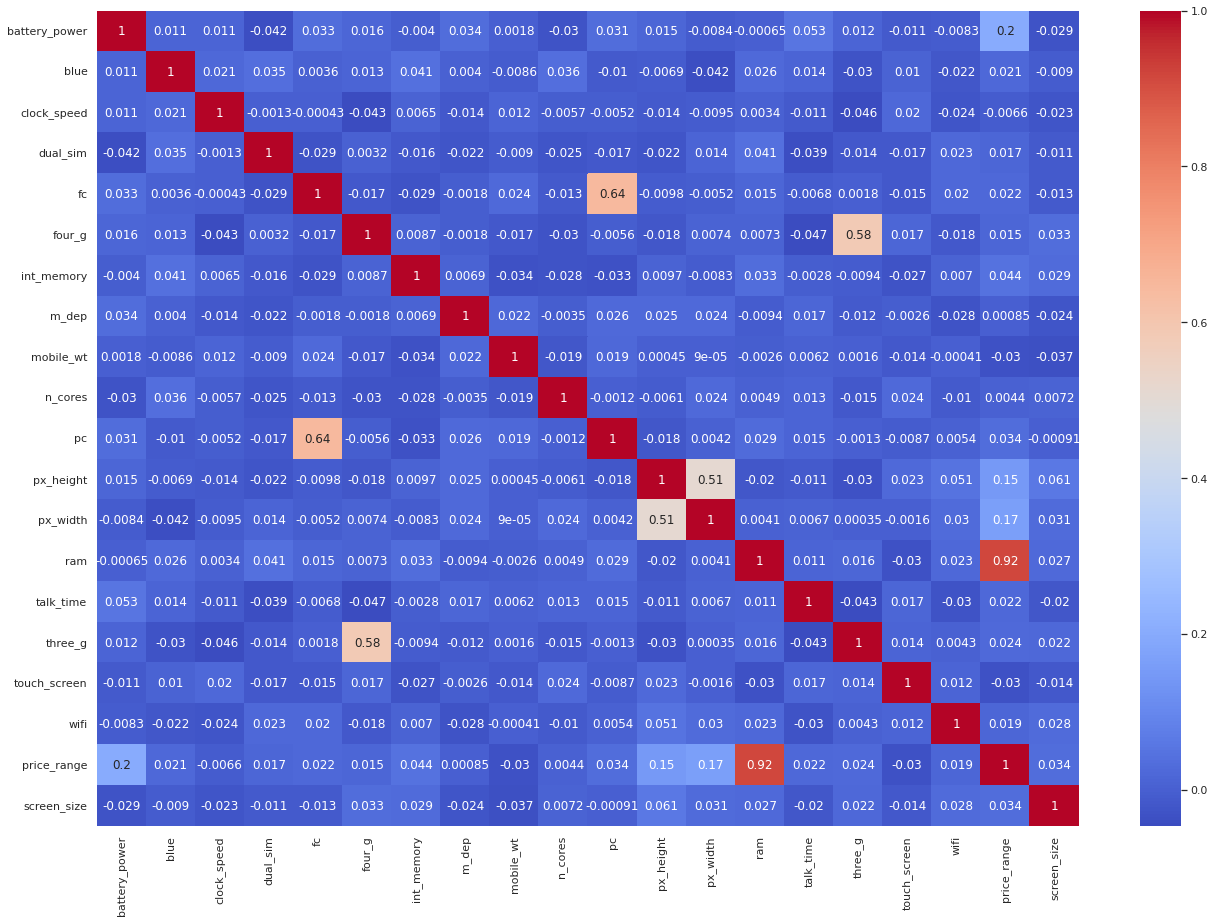

In [224]:
# Checking for multi-collinearity

correlation = mb_price_df.corr()
plt.figure(figsize = [22, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)


RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.
There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.




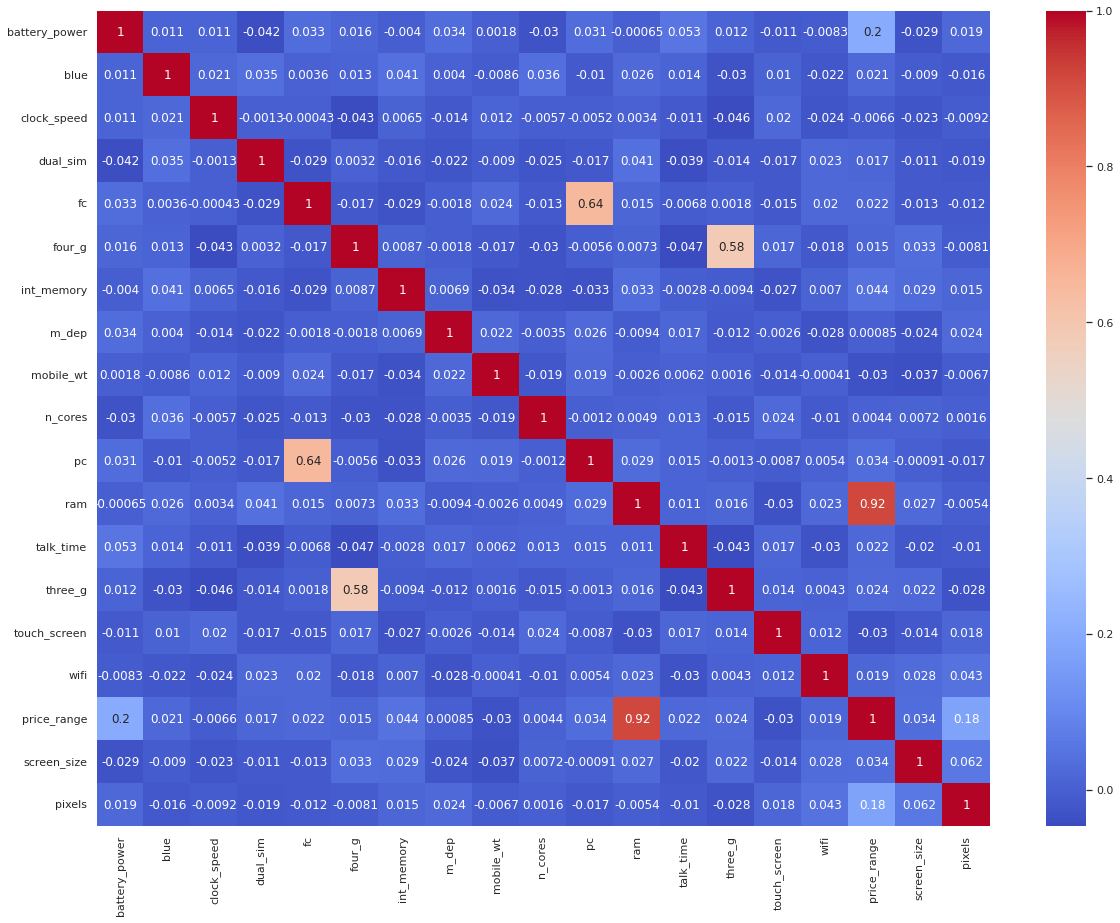

In [225]:
#  defining new variable for pixels

mb_price_df['pixels'] = mb_price_df['px_height']*mb_price_df['px_width']
# Dropping px_height and px_width

mb_price_df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = mb_price_df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)
     

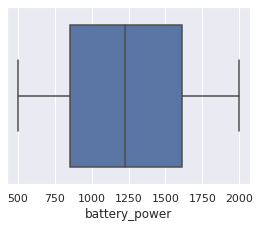

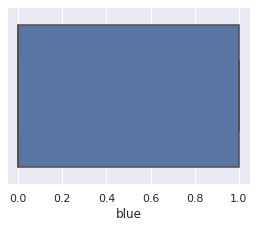

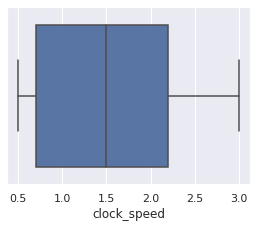

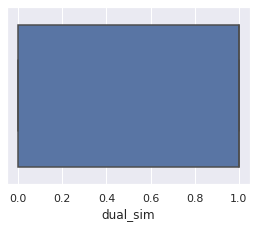

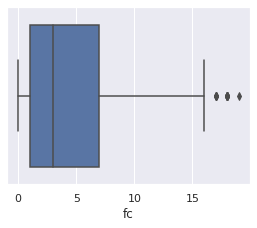

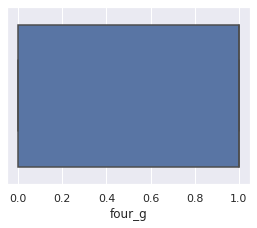

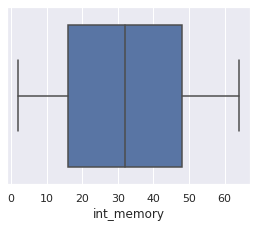

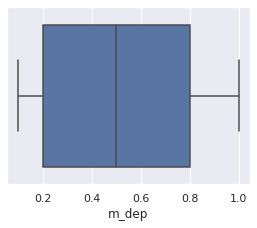

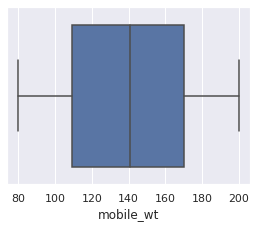

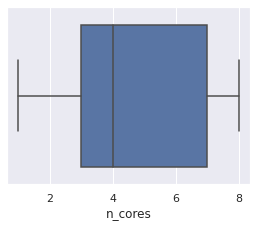

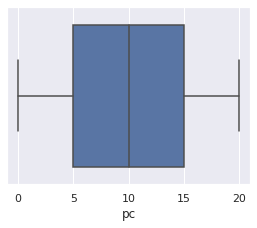

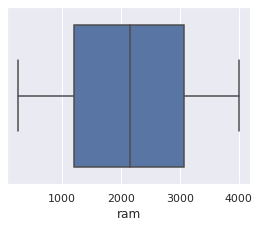

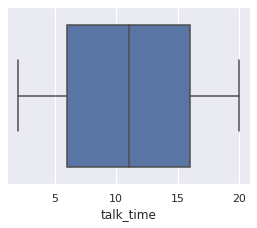

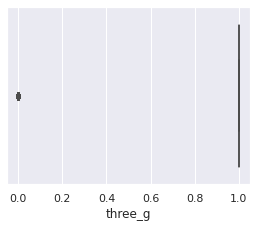

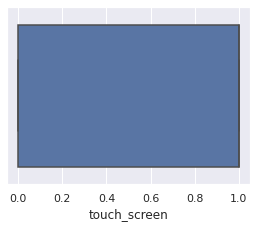

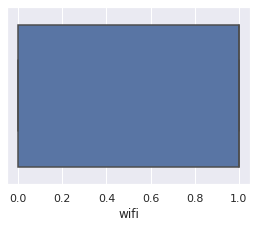

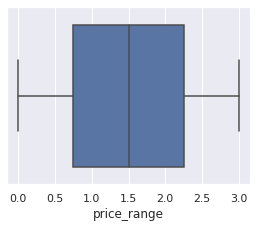

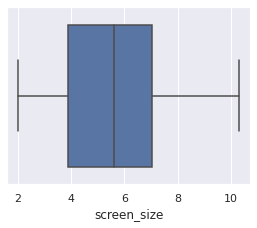

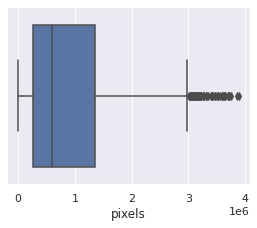

In [226]:
#outlier detection
for col in mb_price_df:
  plt.figure(figsize=(20,15))
  plt.subplot(4,4,1)
  sns.boxplot(mb_price_df[col])
  plt.show()

In [227]:
#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [228]:
calc_vif(mb_price_df[[i for i in mb_price_df.describe().columns if i not in ['price_range','mobile_wt'] ]])

,variables,VIF
0,battery_power,7.649578
1,blue,1.975237
2,clock_speed,4.127523
3,dual_sim,1.985635
4,fc,3.411188
5,four_g,3.192246
6,int_memory,3.895617
7,m_dep,3.802940
8,n_cores,4.499752
9,pc,6.145241


In [229]:
# Defining X and y

X = mb_price_df.drop(['price_range'], axis = 1)
y = mb_price_df['price_range']


In [230]:
X.shape


(2000, 18)

In [231]:
y.shape


(2000,)

In [232]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


## ***Train and Test Split***

In [233]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [234]:
X_train.shape


(1600, 18)

In [235]:
y_train.shape


(1600,)

In [236]:
X_test.shape

(400, 18)

In [237]:
y_test.value_counts()

3    112
0    105
2     92
1     91
Name: price_range, dtype: int64

In [238]:
y_train.value_counts()

1    409
2    408
0    395
3    388
Name: price_range, dtype: int64

## ***5. ML Model Implementation***

In [239]:
accuracy_all_models= []

## ***Model1-Logistic Regression***

In [240]:
lr = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

In [241]:
lr.fit(X_train,y_train)


LogisticRegression(C=100000.0, multi_class='multinomial', solver='newton-cg')

In [242]:
preds = lr.predict(X_test)


In [243]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.935000


In [244]:
lr.coef_

array([[-3.59033550e+01, -1.34419355e-01,  1.04142564e+00,
         1.26805526e+00, -7.23229147e-01,  1.28005723e+00,
        -1.77996784e+00,  5.69738113e-01,  4.34175118e+00,
        -9.63522218e-01, -2.09577114e+00, -1.44465290e+02,
         1.92826201e+00,  1.81503416e-01,  3.02857278e-01,
         6.86232918e-01, -1.45900053e-01, -4.84573823e+01],
       [-6.50835214e+00,  2.05981931e-01, -9.45714641e-02,
        -4.14289048e-01,  9.12703367e-02, -9.57381600e-03,
        -2.45325579e-01,  1.27695477e-01,  1.70079710e+00,
        -3.55637149e-01, -3.03605076e-01, -2.61084913e+01,
        -1.27849760e+00, -6.51534777e-01, -1.52047340e-01,
         6.64236162e-02, -7.39433621e-01, -8.07450994e+00],
       [ 1.22781872e+01,  2.09613018e-01, -4.64063082e-01,
        -8.47617385e-01,  5.36462680e-01, -6.12896510e-01,
        -5.89619485e-01, -2.48703624e-01, -9.03637701e-01,
         2.47643561e-01,  8.71610062e-01,  4.91292843e+01,
        -7.54117357e-01,  2.00000372e-01, -3.50220034e

In [245]:
lr.intercept_

array([ 79.65562165,  31.27594441, -20.32704457, -90.6045215 ])

In [246]:
# Get the predicted probabilities
lr_y_pred_test = lr.predict(X_test)
lr_y_pred_train = lr.predict(X_train)


In [247]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(lr_y_pred_train, y_train))


Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       396
           1       0.95      0.94      0.94       412
           2       0.92      0.93      0.92       406
           3       0.96      0.96      0.96       386

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [248]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(lr_y_pred_test, y_test))


Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       106
           1       0.92      0.92      0.92        91
           2       0.91      0.88      0.90        95
           3       0.93      0.96      0.95       108

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



As our data was balanced, we will see the macro avg score, which is good

In [249]:
accuracy_lr= accuracy_score(y_test, lr_y_pred_test)

In [250]:
accuracy_all_models.append(accuracy_lr)

In [251]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,lr_y_pred_test)

print(cf_matrix)



[[102   3   0   0]
 [  4  84   3   0]
 [  0   4  84   4]
 [  0   0   8 104]]


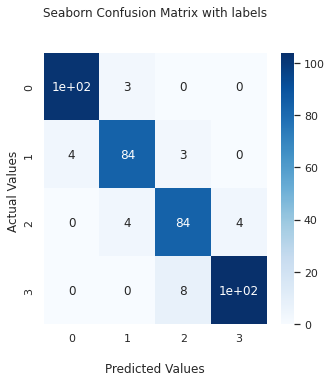

In [252]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# ***Model2-Random Forest***

In [253]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
     

In [254]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300)

In [255]:
rf_y_pred_test = rf.predict(X_test)
accuracy_rf= accuracy_score(y_test, rf_y_pred_test)
accuracy_rf


0.88

In [256]:
rf_y_pred_train = rf.predict(X_train)
train_score = accuracy_score(y_train, rf_y_pred_train)
train_score


1.0

In [257]:
print(classification_report(y_test, rf_y_pred_test))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.81      0.84        91
           2       0.78      0.83      0.80        92
           3       0.93      0.90      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [258]:
accuracy_all_models.append(accuracy_score(rf_y_pred_test, y_test))

[[101   4   0   0]
 [  7  74  10   0]
 [  0   8  76   8]
 [  0   0  11 101]]


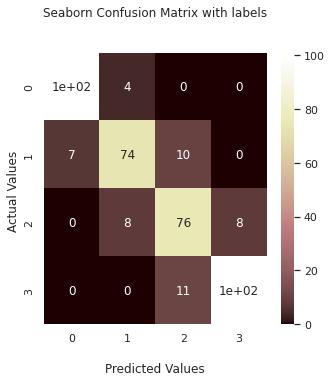

In [259]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, rf_y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='pink')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     


In [260]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.504200
1,battery_power,0.081299
2,pixels,0.076994
3,mobile_wt,0.043180
4,screen_size,0.040575


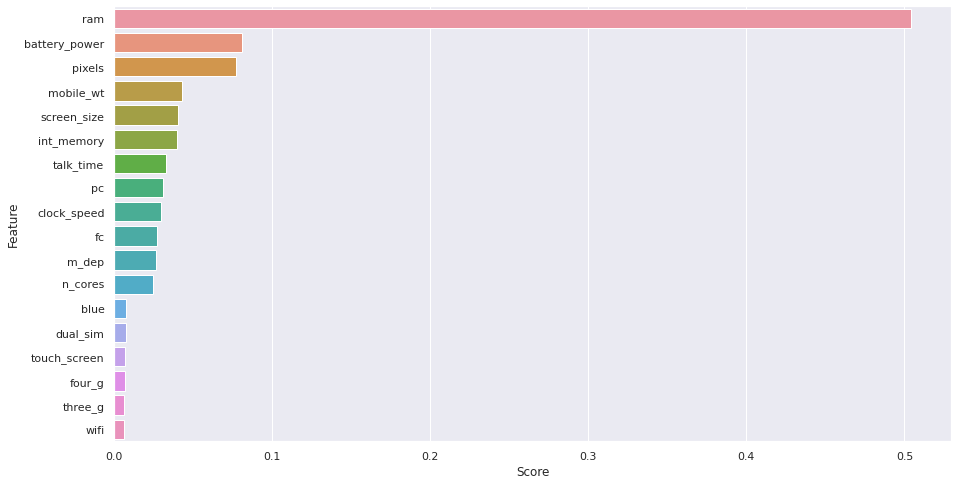

In [261]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


## ***Model3-Hyperparameter tuning for Random Forest***



## **GINI**

In [262]:
rf_gini= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_gini.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [263]:
y_pred_train = rf_gini.predict(X_train)
accuracy_score(y_train, y_pred_train)


0.949375

In [264]:
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       395
           1       0.93      0.92      0.92       409
           2       0.93      0.92      0.93       408
           3       0.97      0.98      0.98       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [265]:
gini_y_pred_test = rf_gini.predict(X_test)
accuracy_gini=accuracy_score(y_test, gini_y_pred_test)


In [266]:
accuracy_all_models.append(accuracy_score(gini_y_pred_test, y_test))

In [267]:
print(classification_report(y_test, gini_y_pred_test))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.84      0.81      0.83        91
           2       0.74      0.78      0.76        92
           3       0.91      0.87      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [268]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_gini.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.694651
1,battery_power,0.073347
2,pixels,0.061221
3,mobile_wt,0.025605
4,int_memory,0.024791


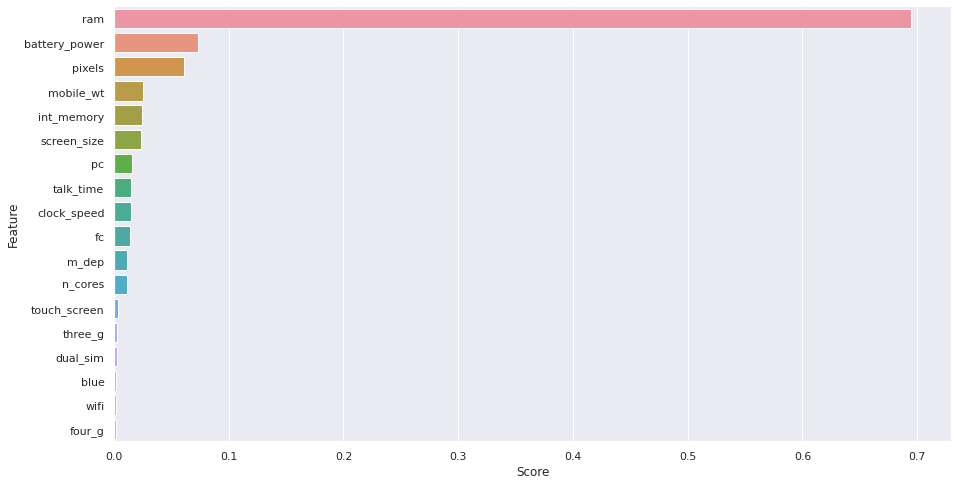

In [269]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


[[101   4   0   0]
 [  7  74  10   0]
 [  0  10  72  10]
 [  0   0  15  97]]


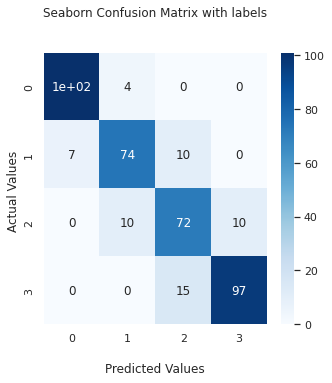

In [270]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, gini_y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


## ***Model4-Decision tree***


In [271]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
# dtc.fit(X_train, y_train)

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [272]:
# Prediction

dt_y_pred_test = dtc.predict(X_test)
dt_y_pred_train = dtc.predict(X_train)

In [273]:
accuracy_dt=accuracy_score(y_test, dt_y_pred_test)

In [274]:
accuracy_all_models.append(accuracy_score(dt_y_pred_test, y_test))

In [275]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(dt_y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



In [276]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':dtc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.811802
1,battery_power,0.097583
2,pixels,0.089935
3,int_memory,0.000680
4,dual_sim,0.000000


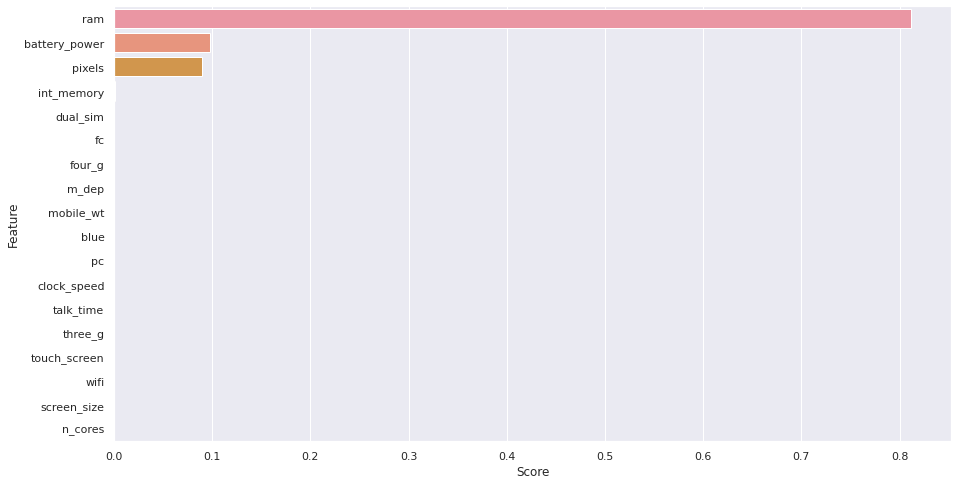

In [277]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


[[91 14  0  0]
 [ 2 74 15  0]
 [ 0 13 72  7]
 [ 0  0 21 91]]


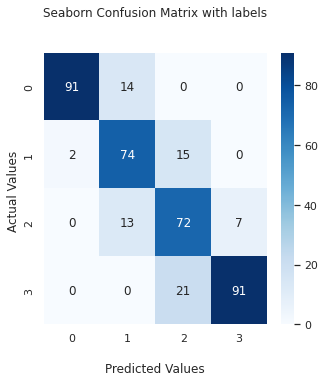

In [278]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, dt_y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     


## ***Model5-XG Boost***

In [279]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
xg_y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, xg_y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.84      0.89      0.86        91
           2       0.82      0.84      0.83        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [280]:
accuracy_xgb=accuracy_score(y_test, xg_y_pred_test)

In [281]:
accuracy_all_models.append(accuracy_score(xg_y_pred_test, y_test))

[[ 98   7   0   0]
 [  5  81   5   0]
 [  0   9  77   6]
 [  0   0  12 100]]


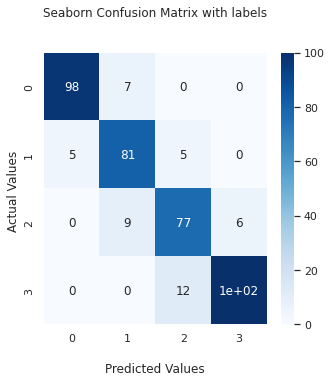

In [282]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, xg_y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [283]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':xgb.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.437261
1,battery_power,0.131072
2,pixels,0.111588
3,mobile_wt,0.032779
4,three_g,0.026682


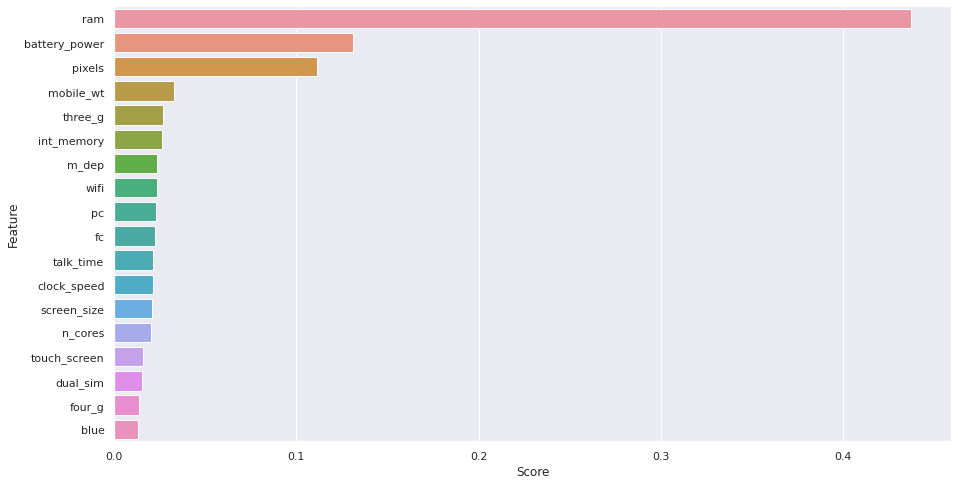

In [284]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## ***Model 6-Naive Bayes***

In [285]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train,y_train)

In [286]:
NB_y_train_pred = NB_model.predict(X_train)
NB_y_test_pred = NB_model.predict(X_test)

In [287]:
# Confusion matrices for train

print(confusion_matrix(y_train,NB_y_train_pred))

[[352  43   0   0]
 [ 31 307  71   0]
 [  0  70 292  46]
 [  0   1  39 348]]


[[94 11  0  0]
 [11 61 19  0]
 [ 0 10 68 14]
 [ 0  0 22 90]]


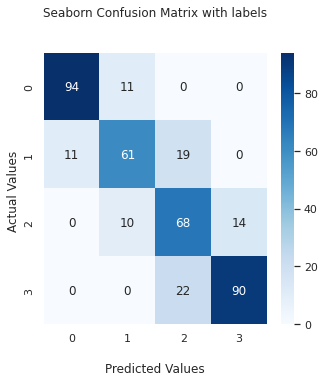

In [288]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, NB_y_test_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [289]:
accuracy_NB=accuracy_score(y_test, NB_y_test_pred)

In [290]:
accuracy_all_models.append(accuracy_score(y_test, NB_y_test_pred))

In [291]:
print(classification_report(y_test, NB_y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.74      0.67      0.71        91
           2       0.62      0.74      0.68        92
           3       0.87      0.80      0.83       112

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



## ***Model 7-Support Vector Machine***

In [292]:
from sklearn import svm
from sklearn.svm import SVC
svm = svm.SVC(decision_function_shape='ovo')
svm_model = svm.fit(X_train,y_train)
svm_predict = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test,svm_predict)
print("Accuracy of the svm model: ", accuracy_svm * 100)


Accuracy of the svm model:  85.25


In [293]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}
GS = GridSearchCV(SVC(),param_grid,cv=5)


In [294]:
model_svm = GS.fit(X_train,y_train)
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'gamma': 0.1, 'kernel': 'linear'} are the best.
the best score is 0.91.


In [295]:
SVM = SVC(decision_function_shape='ovo',gamma = 0.1,kernel = 'linear')

In [296]:
model_svm2 = SVM.fit(X_train,y_train)

In [297]:
svm_pred2  = model_svm2.predict(X_test)
svm_pred2

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 2, 0, 0, 2, 1, 3, 0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [298]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(y_test, svm_pred2))

# Printing accuracy
print(accuracy_score(y_test,svm_pred2))
accuracy_svm = accuracy_score(y_test,svm_pred2)
 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.89      0.89        91
           2       0.80      0.85      0.82        92
           3       0.92      0.88      0.90       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400

0.895


In [299]:
print("Accuravy of the updated svm model: ", accuracy_svm * 100)

Accuravy of the updated svm model:  89.5


In [300]:
accuracy_all_models.append(accuracy_svm)

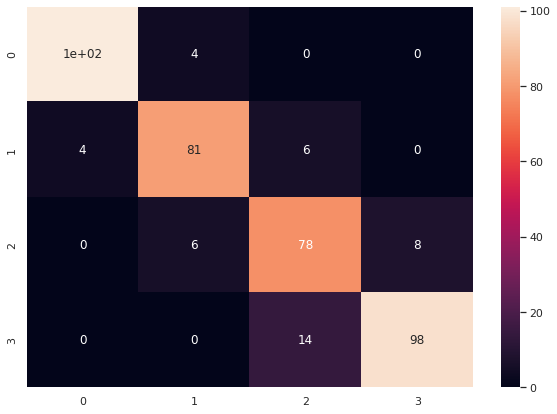

In [301]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,svm_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)
plt.show()

## ***Model 8-KNN***

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [303]:
knn_predict = knn.predict(X_test)
accuracy_KN = accuracy_score(y_test,knn_predict)
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN * 100)

Accuracy of the KNeighbors Classifier model:  43.25


In [304]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,21))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options,leaf_size=[1,2,4,5,10,15])
#create a new knn object
knn_2 = KNeighborsClassifier()
# use GridSearch
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
#fit the model
best_model = grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.47437499999999994
{'leaf_size': 1, 'n_neighbors': 20, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=1, n_neighbors=20, weights='distance')


In [305]:
knn_predict1 = best_model.predict(X_test)
accuracy_KN2 = accuracy_score(y_test,knn_predict1)

In [306]:
knn_predict1

array([0, 3, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 3, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       0, 3, 0, 3, 2, 3, 2, 0, 3, 1, 3, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       1, 0, 3, 2, 3, 1, 3, 0, 1, 2, 1, 2, 0, 3, 0, 1, 0, 2, 3, 2, 0, 1,
       2, 3, 2, 2, 3, 3, 0, 2, 2, 1, 1, 3, 3, 2, 3, 0, 2, 1, 2, 3, 0, 3,
       3, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 0, 0, 1, 1, 1, 0, 3, 2, 0, 0, 1,
       0, 0, 3, 1, 1, 2, 3, 2, 0, 2, 2, 2, 3, 1, 2, 3, 0, 2, 1, 2, 3, 0,
       1, 1, 1, 2, 1, 0, 0, 2, 3, 0, 3, 1, 0, 0, 1, 0, 1, 2, 2, 0, 3, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 0, 1, 0, 2, 0,
       3, 2, 1, 2, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 1, 2, 0, 3, 2, 2, 0, 0,
       1, 2, 2, 1, 3, 3, 2, 3, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 3, 2, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 0, 2, 1, 2, 3, 3, 2, 0, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 2, 2,
       3, 0, 2, 0, 2, 3, 3, 3, 1, 2, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 0, 3,
       0, 1, 3, 1, 0, 1, 3, 2, 1, 2, 0, 0, 2, 3, 2,

In [307]:
print("Accuracy of the KNeighbors Classifier model: ", accuracy_KN2 * 100)

Accuracy of the KNeighbors Classifier model:  45.25


In [308]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing classification report
print(classification_report(y_test, knn_predict1))

# Printing accuracy
print(accuracy_score(y_test,knn_predict1))
accuracy_KN2 = accuracy_score(y_test,knn_predict1)

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       105
           1       0.27      0.26      0.27        91
           2       0.33      0.47      0.39        92
           3       0.65      0.50      0.57       112

    accuracy                           0.45       400
   macro avg       0.46      0.45      0.45       400
weighted avg       0.48      0.45      0.46       400

0.4525


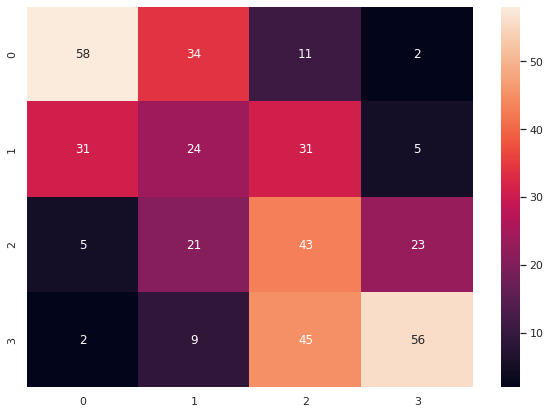

In [309]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,knn_predict1)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [310]:
accuracy_all_models.append(accuracy_KN2)

In [311]:
print(accuracy_all_models)

[0.935, 0.88, 0.86, 0.82, 0.89, 0.7825, 0.895, 0.4525]


In [312]:
# Comparision of accuracy of all the models
model_name=['LR','RF','Gini_RF','DT','XGB','NB','SVM','KNN']
df = pd.DataFrame(list(zip(model_name,accuracy_all_models)),columns=['Model Name','Accuracy']).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df

,Model Name,Accuracy
0,LR,0.9350
1,SVM,0.8950
2,XGB,0.8900
3,RF,0.8800
4,Gini_RF,0.8600
5,DT,0.8200
6,NB,0.7825
7,KNN,0.4525


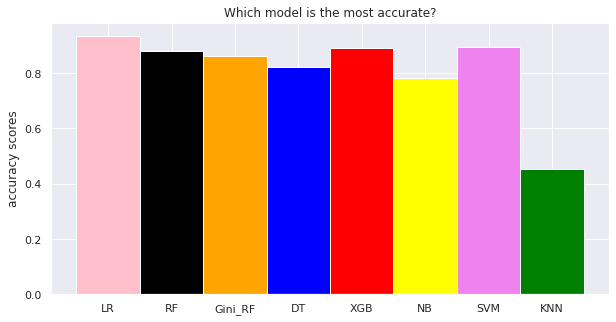

In [313]:
plt.figure(figsize=(10,5))
plt.bar(model_name, accuracy_all_models, color=['pink','black','orange','blue','red','yellow','violet','green'], width = 1.0)
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

Here the above graph shows that Logistic Regression model is performing most accurate on our data.

## ***Model Explainability***

In [314]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [315]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [316]:
# compute SHAP values
explainer = shap.TreeExplainer(dtc)
shap_values = explainer.shap_values(X)

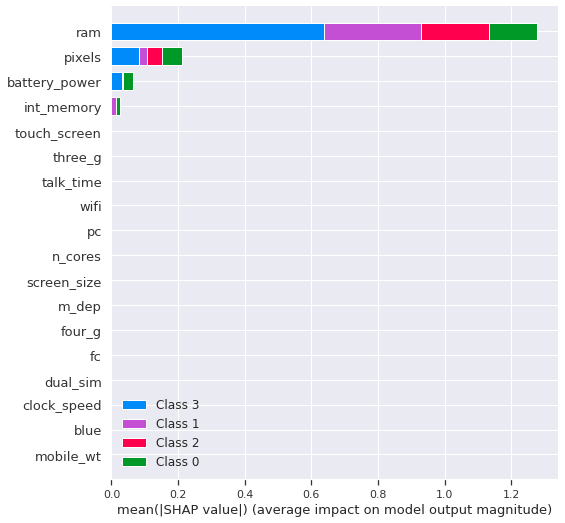

In [317]:
shap.summary_plot(shap_values, X.values, plot_type="bar", feature_names = X.columns)


In this above plot shows that ram is the most important features in predicting price range.Among all the classes of price range class 3 gets most affected by the ram features i.e, more the RAM, more will be price.

## ***Hypothesis Testing***

**Null Hypothesis-** All the price range group are similar according to the ram

**Alternative Hypothesis-**All the price range group are not similar according to the ram

In this hypothesis, we will check whether two or more categories of price ranges are similar or not based on their means similiarity and F score .

There are four different category of price ranges and their ram and other variables are given so we need to check all the basis of ram that all the three groups are similar or not.

In [319]:
df_test = mb_price_df[['ram','price_range']]
df_test['price_range']=df_test['price_range'].map({0:'low_cost',1:'medium_cost',2:'high_cost',3:'very_high_cost'})

df_test

,ram,price_range
0,2549,medium_cost
1,2631,high_cost
2,2603,high_cost
3,2769,high_cost
4,1411,medium_cost
...,...,...
1995,668,low_cost
1996,2032,high_cost
1997,3057,very_high_cost
1998,869,low_cost


In [323]:
grps = pd.unique(df_test.price_range.values)
grps

array(['medium_cost', 'high_cost', 'very_high_cost', 'low_cost'],
      dtype=object)

In [324]:
d_data = {grp:df_test['ram'][df_test.price_range == grp] for grp in grps}
d_data

{'medium_cost': 0       2549
 4       1411
 5       1067
 12      1482
 18      1835
         ... 
 1981    1300
 1984    2216
 1986    1850
 1988    1620
 1989    2592
 Name: ram, Length: 500, dtype: int64, 'high_cost': 1       2631
 2       2603
 3       2769
 13      2680
 25      2782
         ... 
 1970    2023
 1977    2358
 1982    2313
 1983    3248
 1996    2032
 Name: ram, Length: 500, dtype: int64, 'very_high_cost': 6       3220
 10      3946
 11      3826
 16      3554
 17      3752
         ... 
 1991    3579
 1993    3962
 1994    3978
 1997    3057
 1999    3919
 Name: ram, Length: 500, dtype: int64, 'low_cost': 7        700
 8       1099
 9        513
 14       373
 15       568
         ... 
 1987    1424
 1990     296
 1992    1180
 1995     668
 1998     869
 Name: ram, Length: 500, dtype: int64}

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value

In [326]:
F, p = stats.f_oneway(d_data['medium_cost'], d_data['high_cost'], d_data['very_high_cost'],d_data['low_cost'])


In [327]:
print(p)

0.0


In [328]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


reject null hypothesis


# As our null hypothesis got rejected hence it is proved that ram is not similar for different price ranges

# **Conclusion**

With technology becoming a part of our lives, we witness an incredible increase
in phone usage. People of all ages and geographies now use smartphones. Even old age people can be seen using a smartphone, or a young child who
has just learned to read and write. Moreover, many giant technology companies
are launching various phones every month that offer many new features. But even
this cannot meet the demand. In an environment where there is such a huge demand
for smartphones, it can be difficult to determine which phone is how good. In this
study, we use large no. of features of the phones to see which features are important and how much. Also derive some important results by the use of various ML algorithms which can be useful for the business.

1.  People are ready to pay more if a phone has a good RAM, a good camera and battery.

2. Costly phones are lighter. It shows that if you keep your phones light, you can sell the same at a high cost.

1.  RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
 
2.  From all the experiments we performed, concludes that logistic regression and XGboosting gave the best results. 
